In [202]:
#load data
import pandas as pd
path = "Desktop/Food_Inspections.csv"
df = pd.read_csv(path)
df = pd.DataFrame(df, columns =  ['Violations', 'Results']).dropna()
df.head(5)

,Violations,Results
0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass w/ Conditions
1,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,Pass
3,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass w/ Conditions
4,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,Fail
6,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,Pass w/ Conditions


In [203]:
#extract comments
import re
vio = [df.iloc[i,0]+"|" for i in range (df.shape[0])]
pattern = "\- Comments:(.*?)\|"
comments = [re.findall(pattern, vio[i]) for i in range(len(vio))]
flatcom = [', '.join(comments[i]) for i in range(len(comments))]

#put flatcom back into df
df['Violations'] = pd.DataFrame(flatcom)

In [216]:
#reset index
x = df.Results.reset_index(drop=True)

In [237]:
#reclassify to 2 classes
for i in range(len(x)):
    if x[i] == "Fail":
        x[i] = 0
    else:
        x[i] = 1
        
df['Results'] = x

In [241]:
#split train and test data
from sklearn.model_selection import train_test_split
df.dropna(subset = ['Violations'], inplace=True)
X = df.Violations
y = df.Results
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [252]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect = CountVectorizer(stop_words='english',ngram_range=(1, 3))
#Comment: We use two text pre-processing techniques: removing stop words and utilizing ngrams. 

# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

Logistic Regression Model

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print("Accuracy Score")
print(metrics.accuracy_score(y_test, y_pred_class))
print("\nClassification Report")
print(classification_report(y_test, y_pred_class))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy Score
0.8588524650343232

Classification Report
              precision    recall  f1-score   support

           0       0.13      0.03      0.05      3287
           1       0.88      0.97      0.92     23954

    accuracy                           0.86     27241
   macro avg       0.50      0.50      0.49     27241
weighted avg       0.79      0.86      0.82     27241


Confusion Matrix
[[   98  3189]
 [  656 23298]]


Naive Bayes Model

In [243]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class_nb = nb.predict(X_test_dtm)
print("Accuracy Score")
print(metrics.accuracy_score(y_test, y_pred_class_nb))
print("\nClassification Report")
print(classification_report(y_test, y_pred_class_nb))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_nb))

Accuracy Score
0.8756286479938328

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.00      0.01      3287
           1       0.88      1.00      0.93     23954

    accuracy                           0.88     27241
   macro avg       0.50      0.50      0.47     27241
weighted avg       0.79      0.88      0.82     27241


Confusion Matrix
[[   15  3272]
 [  116 23838]]


Support Vector Machine

In [253]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(max_iter=100, tol=None)
svm.fit(X_train_dtm, y_train)
y_pred_class_svm = svm.predict(X_test_dtm)
print("Accuracy Score")
print(metrics.accuracy_score(y_test, y_pred_class_svm))
print("\nClassification Report")
print(classification_report(y_test, y_pred_class_svm))
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_class_svm))

Accuracy Score
0.8438016225542381

Classification Report
              precision    recall  f1-score   support

           0       0.14      0.06      0.08      3287
           1       0.88      0.95      0.91     23954

    accuracy                           0.84     27241
   macro avg       0.51      0.50      0.50     27241
weighted avg       0.79      0.84      0.81     27241


Confusion Matrix
[[  184  3103]
 [ 1152 22802]]


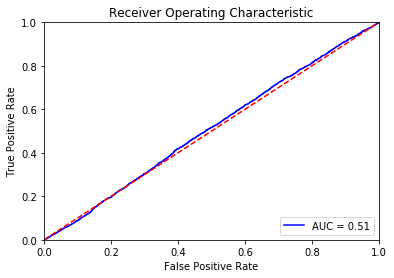

In [248]:
#ROC Curve Graph for Logistics Regression
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

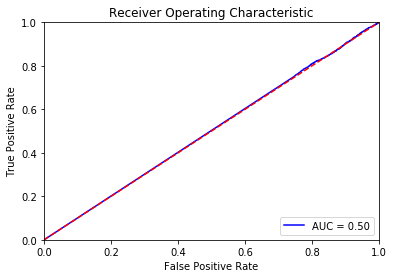

In [244]:
#ROC Curve Graph for Navie Bayes
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Comment: We first reclassify our output into two levels: fail and pass. Then we use Count Vectorizer with the argument to remove stop words as well as to perform n grams. After these text preprocessing steps, we split our data into training and testing set, and perform 3 classification models: Logistic Regression, SVM, and Navie Bayes. All the models has accuracy rates at around 80+%, with Navie Bayes being the best performing model based on accuracy rates. However, we notice that our data is extremely inbalance. The accuracy rate could be as high as 87% if we simply classified all the data as "pass". Hence, when we are looking at the ROC curve for Logistics and Navie Bayes, the AUC is around 50%, which indicates that the models are not able to classify the two classes correctly. 